In [33]:
import pickle

In [34]:
path = "./metrics/cd_metrics.pkl"
metrics_ = pickle.load(open(path, "rb"))

In [35]:
metrics_

{'louvain': defaultdict(dict,
             {0.0036136136136136134: {'modularity': 0.3229909743590621,
               'mean_homogeneity': 0.5929584197404434,
               'median_homogeneity': 0.7116564417177914,
               'nmi': 0.49765692643743537,
               'ari': 0.4264552848601493,
               'f1': 0.357787417139459},
              0.004194194194194194: {'modularity': 0.34494596256536786,
               'mean_homogeneity': 0.5549332741675412,
               'median_homogeneity': 0.5654477561730471,
               'nmi': 0.4492091957033938,
               'ari': 0.2915499770857967,
               'f1': 0.3177584319919267},
              0.004824824824824825: {'modularity': 0.36655709560172245,
               'mean_homogeneity': 0.5702477726969392,
               'median_homogeneity': 0.6231778425655976,
               'nmi': 0.4362985966708838,
               'ari': 0.34360075171060006,
               'f1': 0.225759405634142},
              0.005205205205205205: {'mo

In [28]:
print(thresholds)
print(algorithms)
print(modularity)
print(nmi)
print(f1)

[0.0036136136136136134, 0.004194194194194194, 0.004824824824824825, 0.005205205205205205, 0.005495495495495496, 0.005995995995995996, 0.006666666666666666, 0.007417417417417417, 0.007787787787787787, 0.008128128128128128, 0.008558558558558558, 0.009219219219219218, 0.00965965965965966, 0.0035135135135135136, 0.004024024024024024, 0.004454454454454454, 0.005045045045045045, 0.005335335335335335, 0.005735735735735736, 0.006286286286286286, 0.007177177177177177, 0.007587587587587588, 0.008008008008008008, 0.008308308308308308, 0.008948948948948949, 0.009429429429429429, 0.0098998998998999, 0.00476995213776347, 0.004, 0.004194194194194194, 0.004824824824824825, 0.005205205205205205, 0.005495495495495496, 0.005995995995995996, 0.006666666666666666, 0.007417417417417417, 0.007787787787787787, 0.008128128128128128, 0.008558558558558558, 0.009219219219219218, 0.00965965965965966, 0.004024024024024024, 0.004454454454454454, 0.005045045045045045, 0.005335335335335335, 0.005735735735735736, 0.006

In [29]:
df

,Algorithm,Threshold,Modularity,NMI,F1
0,louvain,0.003614,0.322991,0.497657,0.357787
1,louvain,0.004194,0.344946,0.449209,0.317758
2,louvain,0.004825,0.366557,0.436299,0.225759
3,louvain,0.005205,0.382502,0.446885,0.330779
4,louvain,0.005495,0.390139,0.474293,0.373493
...,...,...,...,...,...
134,walktrap,0.008949,0.398164,0.515670,0.770497
135,walktrap,0.009429,0.382429,0.519634,0.786627
136,walktrap,0.009900,0.391258,0.534030,0.743281
137,walktrap,0.004770,0.268904,0.461787,0.501972


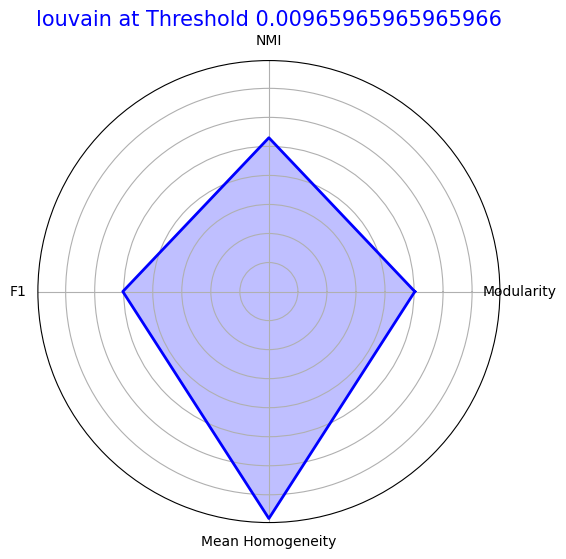

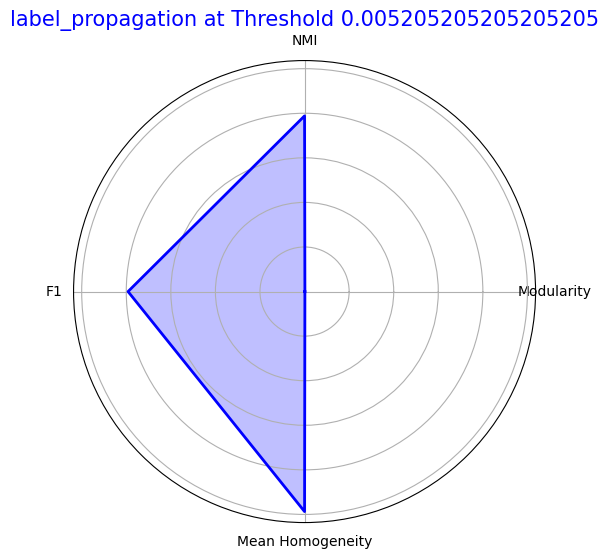

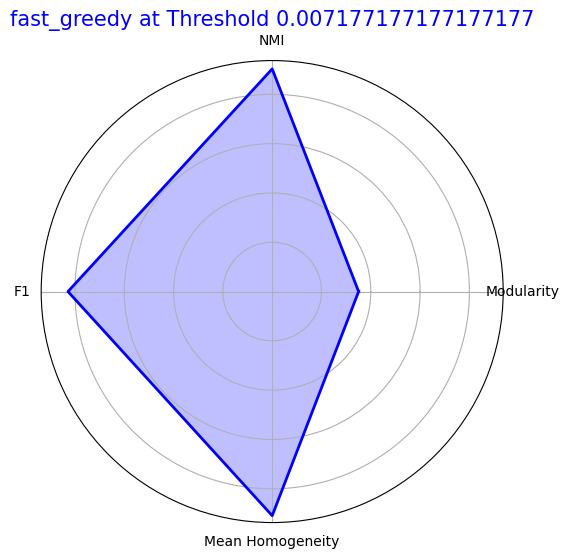

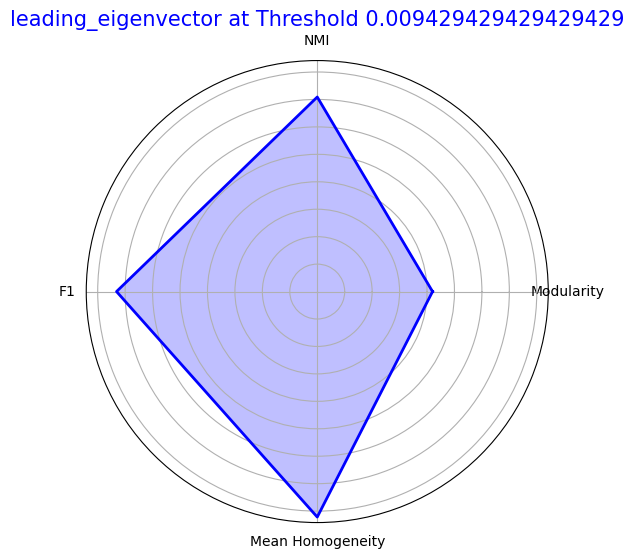

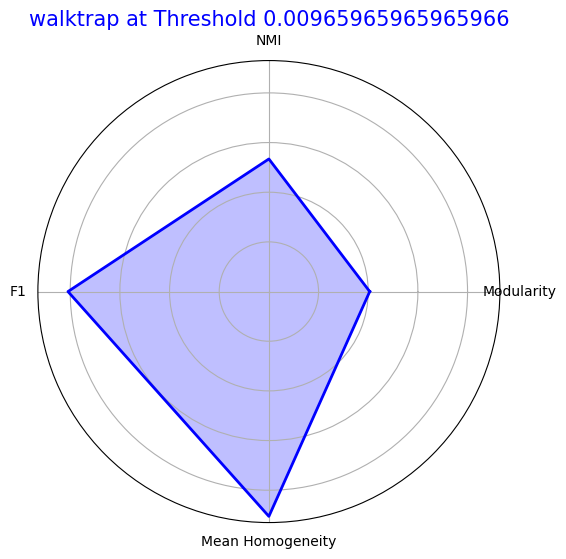

In [37]:
import numpy as np

def radar_chart(metrics, categories, title):
    N = len(categories)
    angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
    metrics += metrics[:1]
    angles += angles[:1]
    
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    ax.fill(angles, metrics, color='b', alpha=0.25)
    ax.plot(angles, metrics, color='b', linewidth=2)
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)
    ax.set_title(title, size=15, color='b')
    plt.show()

# Categories for the radar plot
categories = ['Modularity', 'NMI', 'F1', 'Mean Homogeneity']

algo_to_thr = {
    "louvain": 0.00965965965965966,
    "label_propagation": 0.005205205205205205,
    "fast_greedy": 0.007177177177177177,
    "leading_eigenvector": 0.009429429429429429,
    "walktrap": 0.00965965965965966
}

# Iterate through all algorithms and their thresholds to create radar charts
for algo, thresholds_data in metrics_.items():
    thr = algo_to_thr[algo]
    for threshold, metrics in thresholds_data.items():
        if threshold != thr:
            continue
        metrics_values = [
            metrics['modularity'],
            metrics['nmi'],
            metrics['f1'],
            metrics['mean_homogeneity'],
            # metrics['median_homogeneity']
        ]
        title = f"{algo} at Threshold {threshold}"
        radar_chart(metrics_values, categories, title)


In [38]:
community_detection_algorithms = ['louvain', 'label_propagation', 'fast_greedy', 'leading_eigenvector', 'walktrap']

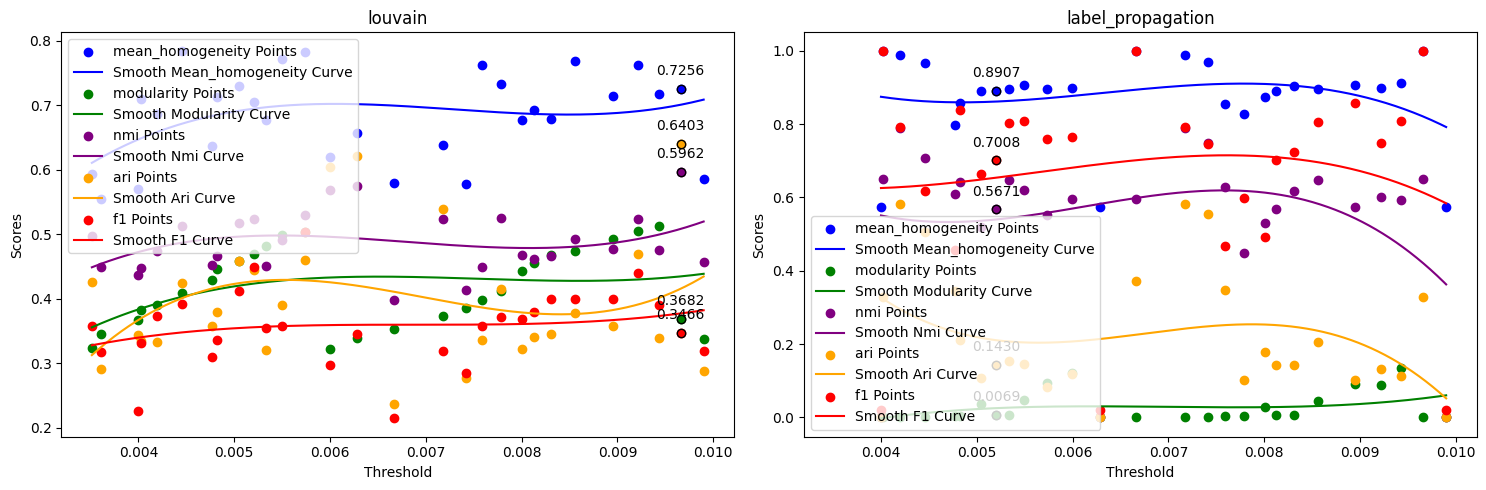

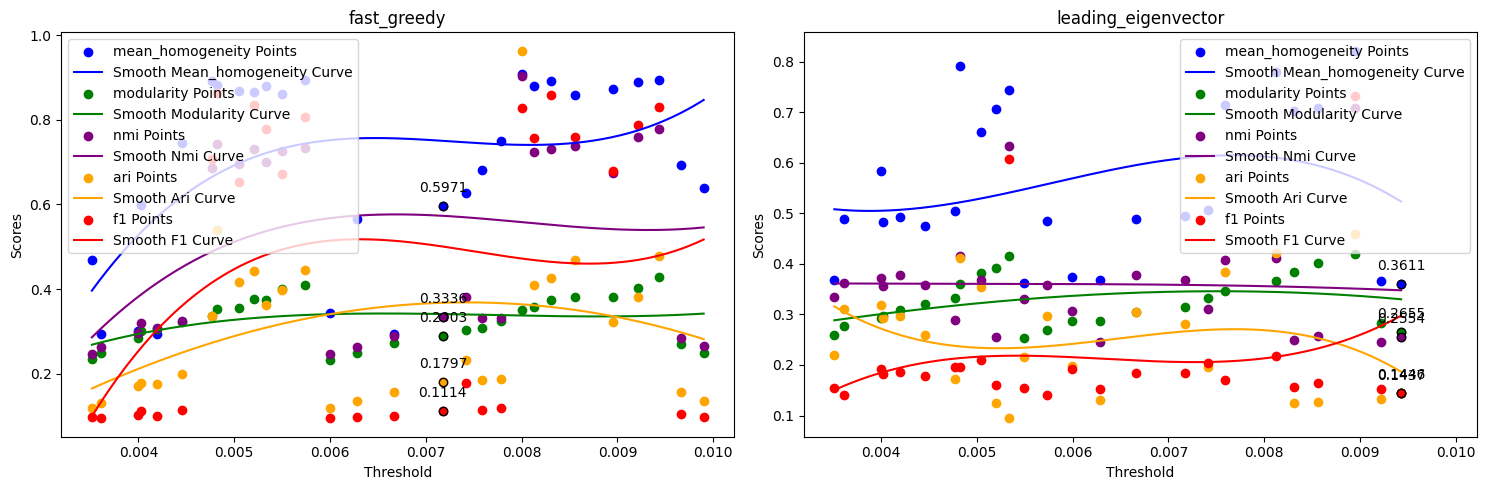

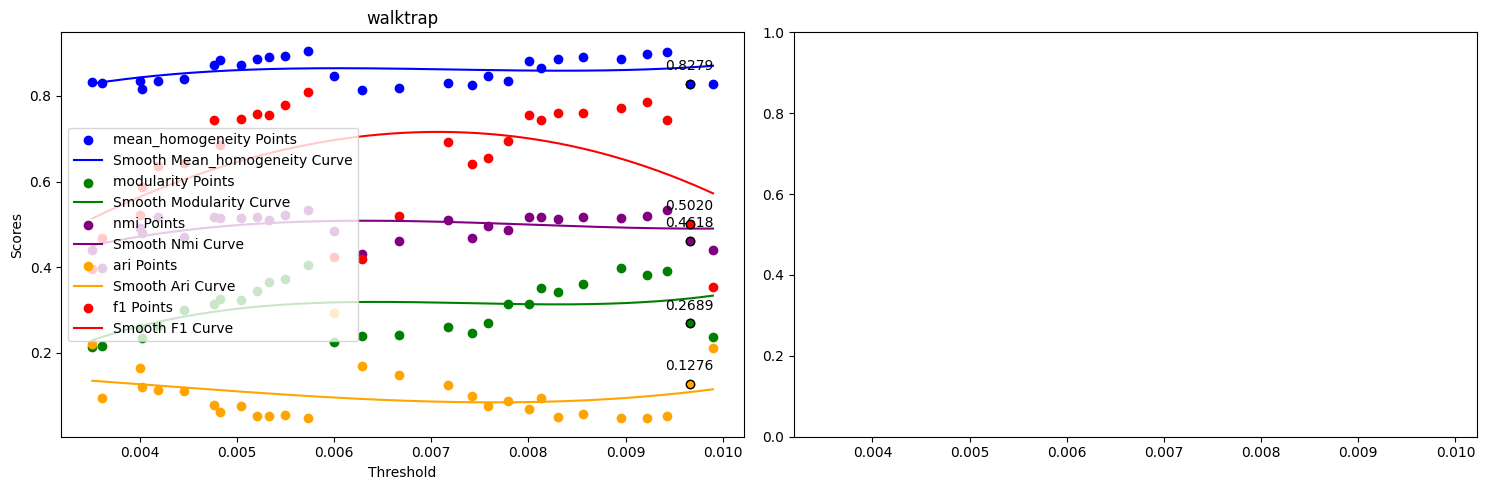

In [40]:
import numpy as np
import matplotlib.pyplot as plt

def plot(data, algorithms, target_threshold=[]):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5), sharex=True, sharey=False)
    axes = axes.flatten()  # Flatten the array of axes for easier iteration

    # Metrics to plot
    metrics = ['mean_homogeneity', 'modularity', 'nmi', 'ari', 'f1']
    metric_colors = {
        'mean_homogeneity': 'blue',
        'modularity': 'green',
        'nmi': 'purple',
        'ari': 'orange',
        'f1': 'red'
    }

    for idx, algo in enumerate(algorithms):
        thresholds = np.array(list(data[algo].keys()))
        
        # Store metrics data
        metric_data = {metric: np.array([data[algo][threshold][metric] for threshold in thresholds]) for metric in metrics}
        
        # Sorting data for plotting
        sorted_indices = np.argsort(thresholds)
        thresholds = thresholds[sorted_indices]
        
        # Fit smooth lines for all metrics
        smooth_thresholds = np.linspace(thresholds.min(), thresholds.max(), 500)
        smooth_metrics = {metric: np.poly1d(np.polyfit(thresholds, metric_data[metric], 3))(smooth_thresholds) for metric in metrics}
        
        # Plot all metrics
        for metric in metrics:
            axes[idx].scatter(thresholds, metric_data[metric], color=metric_colors[metric], label=f'{metric} Points')
            axes[idx].plot(smooth_thresholds, smooth_metrics[metric], label=f'Smooth {metric.capitalize()} Curve', color=metric_colors[metric])

        if target_threshold[idx] is not None and target_threshold[idx] in thresholds:
            tgt = target_threshold[idx]
            target_index = np.where(thresholds == tgt)[0][0]
            
            # Mark points for each metric at the target threshold
            for metric in metrics:
                target_value = metric_data[metric][target_index]
                axes[idx].scatter(tgt, target_value, color=metric_colors[metric], edgecolor='black', zorder=5)
                axes[idx].annotate(f'{target_value:.4f}', (tgt, target_value),
                                   textcoords="offset points", xytext=(0, 10), ha='center')
        
        axes[idx].set_title(algo)
        axes[idx].set_xlabel('Threshold')
        axes[idx].set_ylabel('Scores')
        axes[idx].legend()

    plt.tight_layout()
    plt.show()

plot(metrics_, community_detection_algorithms[:2], target_threshold=[0.00965965965965966, 0.005205205205205205])
plot(metrics_, community_detection_algorithms[2:4], target_threshold=[0.007177177177177177, 0.009429429429429429])
plot(metrics_, community_detection_algorithms[4:6], target_threshold=[0.00965965965965966])